In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Read in file

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from tabulate import tabulate
import matplotlib.pyplot as plt

In [ ]:
model_data = '/content/drive/My Drive/FYDP/Prototype - I1/model_data.csv'
df = pd.read_csv(model_data)
df.shape

(8105, 7)

# Functions for encoding values and splitting data into train/test sets

In [ ]:
# label encoding functions
def enc_cond(df1):
  label_enc_condition = {'Satisfactory':1, 'Good':2, 'Very good':3, 'New without tags':4, 'New with tags':5}
  df1 = df1.replace({"condition": label_enc_condition})
  return df1
def enc_gen(df1):
  label_enc_gender = {'men':0, 'women':1}
  df1 = df1.replace({"gender": label_enc_gender})
  return df1

# one hot encoding function
def one_hot(df1, cols):
  df1 = pd.get_dummies(df1, columns=cols)
  return df1

In [ ]:
from sklearn.model_selection import train_test_split
# Split dataset (split into train, test, validate sets split use train_test_split twice)
# How are they used? Train is used across all models in the fit function, validation used in the predict. 
# After a final model has been selected, then use the test set.
def split_data(X, y, seed, split_size):
  # print(X.shape, y.shape)

  seed = seed
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=seed)

  # print(X_train.shape, y_train.shape)
  # print(X_test.shape, y_test.shape)
  return  X_train, X_test, y_train, y_test

# Models

In [ ]:
def all_cols(df1):
  #df1 = df
  df1 = enc_cond(df1)
  df1 = enc_gen(df1)
  df1 = one_hot(df1, ['brand', 'size','colour','category-1'])
  # print(df1.head())
  X = df1.drop('price', axis=1) # inputs
  y = df1['price'] # output
  X_train, X_val, y_train, y_val = split_data(X, y, 3, 0.25) # split into 75/25
  # X_val, X_test, y_val, y_test = split_data(X_val1, y_val1, 3, 0.4) # split into 15/10 
  return X_train, X_val, y_train, y_val

def no_colour(df1):
  #df1 = df
  df1 = df1.drop('colour', axis=1)
  df1 = enc_cond(df1)
  df1 = enc_gen(df1)
  df1 = one_hot(df1, ['brand', 'size','category-1'])
  # print(df1.head())
  X = df1.drop('price', axis=1) # inputs
  y = df1['price'] # output
  X_train, X_val, y_train, y_val = split_data(X, y, 3, 0.25) # split into 75/25
  # X_val, X_test, y_val, y_test = split_data(X_val1, y_val1, 3, 0.4) # split into 15/10 
  return X_train, X_val, y_train, y_val

def no_gender(df1):
  #df1 = df
  df1 = df1.drop('gender', axis=1)
  df1 = enc_cond(df1)
  # df1 = enc_gen(df1)
  df1 = one_hot(df1, ['brand', 'colour', 'size','category-1'])
  # print(df1.head())
  X = df1.drop('price', axis=1) # inputs
  y = df1['price'] # output
  X_train, X_val, y_train, y_val = split_data(X, y, 3, 0.25) # split into 75/25
  # X_val, X_test, y_val, y_test = split_data(X_val1, y_val1, 3, 0.4) # split into 15/10 
  return X_train, X_val, y_train, y_val

def no_size(df1):
  #df1 = df
  df1 = df1.drop('size', axis=1)
  df1 = enc_cond(df1)
  df1 = enc_gen(df1)
  df1 = one_hot(df1, ['brand', 'colour', 'category-1'])
  # print(df1.head())
  X = df1.drop('price', axis=1) # inputs
  y = df1['price'] # output
  X_train, X_val, y_train, y_val = split_data(X, y, 3, 0.25) # split into 75/25
  # X_val, X_test, y_val, y_test = split_data(X_val1, y_val1, 3, 0.4) # split into 15/10 
  return X_train, X_val, y_train, y_val

# key cols = Brand, Condition, Category-1, Price
def key_cols(df1):
  #df1 = df
  df1 = df1.drop(['colour','gender','size'], axis=1)
  df1 = enc_cond(df1)
  # df1 = enc_gen(df1)
  df1 = one_hot(df1, ['brand', 'category-1'])
  # print(df1.head())
  X = df1.drop('price', axis=1) # inputs
  y = df1['price'] # output
  X_train, X_val, y_train, y_val = split_data(X, y, 3, 0.25) # split into 75/25
  # X_val, X_test, y_val, y_test = split_data(X_val1, y_val1, 3, 0.4) # split into 15/10 
  return X_train, X_val, y_train, y_val

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
dfs = [all_cols, no_colour, no_gender, no_size, key_cols]
errors = []
scores = []
mses = []
for i in dfs:
  df1 = df
  X_train, X_val, y_train, y_val = i(df1)
  clf.fit(X_train, y_train)
  y_predict = clf.predict(X_val)
  #print(clf.score(X_train, y_train)) # Best possible score is a 1, but make sure that the model isn't overfitted
  errors.append((y_predict != y_val).sum())
  #print(errors)
  scores.append(clf.score(X_val, y_val))

  mses.append(mse(y_val, y_predict)) # the closer to 0 the better
  # #print('Mean Squared Error:', err)

In [ ]:
headers = ['Columns Included', 'Wrong Predictions', 'Score', 'Mean Squared Error']
table = zip(dfs, errors, scores, mses)
print(tabulate(table, headers=headers))

Columns Included                          Wrong Predictions     Score    Mean Squared Error
--------------------------------------  -------------------  --------  --------------------
<function all_cols at 0x7f0aaf85ab70>                  2025  0.250266               231.146
<function no_colour at 0x7f0aaf8511e0>                 2027  0.251951               230.626
<function no_gender at 0x7f0aaf85ae18>                 2024  0.239035               234.608
<function no_size at 0x7f0aaf85aea0>                   2027  0.250234               231.156
<function key_cols at 0x7f0aaf85a598>                  2027  0.242539               233.528


In [ ]:
# # b value is
# print(clf.intercept_)
# # x1 - x92 (we have 92 different features so therefore 92 different slopes)
# print(clf.coef_)
df_val = pd.DataFrame({'Actual': y_val, 'Predicted': y_predict})
df_val1 = df_val[df_val['Actual'] < 10]
df_val1 = df_val1.head(25)
# df_val1.plot(kind='bar',figsize=(10,8))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

### Ridge


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
from sklearn.linear_model import Ridge
# Hypertune values for Ridge using GridSearchCV
clf_ridge=Ridge()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 0.05, 0.001, 5, 10, 15] 
# so alpha plays a marginal role in this so we'll just keep using the default = 1
grid = dict(alpha = alpha)
grid_search = GridSearchCV(estimator = clf_ridge, param_grid = grid, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Ridge CV
clf_RidgeCV = RidgeCV(alphas=alpha, fit_intercept=False, normalize=True).fit(X_train, y_train)
print(clf.score(X_val, y_val))

Best: 0.243706 using {'alpha': 1.2}
0.2425392861325446


In [ ]:
# Regular Ridge implementation

clf_ridge = Ridge(alpha=1.2,  max_iter=100)
dfs = [all_cols, no_colour, no_gender, no_size, key_cols]
errors = []
scores = []
mses = []
for i in dfs:
  df1 = df
  X_train, X_val, y_train, y_val = i(df1)
  clf_ridge.fit(X_train, y_train)
  y_predict = clf_ridge.predict(X_val)
  #print(clf.score(X_train, y_train)) # Best possible score is a 1, but make sure that the model isn't overfitted
  errors.append((y_predict != y_val).sum())
  #print(errors)
  scores.append(clf_ridge.score(X_val, y_val))

  mses.append(mse(y_val, y_predict)) # the closer to 0 the better
  # #print('Mean Squared Error:', err)

In [ ]:
headers = ['Columns Included', 'Wrong Predictions', 'Score', 'Mean Squared Error']
table = zip(dfs, errors, scores, mses)
print(tabulate(table, headers=headers))

Columns Included                          Wrong Predictions     Score    Mean Squared Error
--------------------------------------  -------------------  --------  --------------------
<function all_cols at 0x7f0aaf85ab70>                  2027  0.25019                231.169
<function no_colour at 0x7f0aaf8511e0>                 2027  0.252107               230.578
<function no_gender at 0x7f0aaf85ae18>                 2027  0.240217               234.244
<function no_size at 0x7f0aaf85aea0>                   2027  0.250375               231.112
<function key_cols at 0x7f0aaf85a598>                  2027  0.242824               233.44


### Lasso - Not as good as Linear/Ridge so not hypertuning this one

In [ ]:
from sklearn.linear_model import Lasso
clf_lasso = Lasso()
dfs = [all_cols, no_colour, no_gender, no_size, key_cols]
errors = []
scores = []
mses = []
for i in dfs:
  df1 = df
  X_train, X_val, y_train, y_val = i(df1)
  clf_lasso.fit(X_train, y_train)
  y_predict = clf_lasso.predict(X_val)
  errors.append((y_predict != y_val).sum())
  scores.append(clf_lasso.score(X_val, y_val))
  mses.append(mse(y_val, y_predict))

In [ ]:
headers = ['Columns Included', 'Wrong Predictions', 'Score', 'Mean Squared Error']
table = zip(dfs, errors, scores, mses)
print(tabulate(table, headers=headers))

Columns Included                          Wrong Predictions     Score    Mean Squared Error
--------------------------------------  -------------------  --------  --------------------
<function all_cols at 0x7fa34b5b78c8>                  2027  0.101861                 276.9
<function no_colour at 0x7fa34b30eea0>                 2027  0.101861                 276.9
<function no_gender at 0x7fa34b30ea60>                 2027  0.101861                 276.9
<function no_size at 0x7fa34b30e268>                   2027  0.101861                 276.9
<function key_cols at 0x7fa34b30e950>                  2027  0.101861                 276.9


### KNN Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
df1 = df
X_train, X_val, y_train, y_val = all_cols(df1)
mse_vals = []
from sklearn.neighbors import KNeighborsRegressor
# first we try to find which K value gives the lowest error (too small K value leads to underfitting, too large K leads to overfitting)
K = 15
for i in range(1,K+1):
  neigh = KNeighborsRegressor(n_neighbors=i)
  neigh.fit(X_train, y_train)
  y_predict = neigh.predict(X_val)
  err = mse(y_val, y_predict)
  print('Using K = {}, Mean Squared Error = {:.3f}'.format(i,err))
  mse_vals.append(err)

Using K = 1, Mean Squared Error = 410.831
Using K = 2, Mean Squared Error = 339.414
Using K = 3, Mean Squared Error = 307.032
Using K = 4, Mean Squared Error = 283.443
Using K = 5, Mean Squared Error = 272.727
Using K = 6, Mean Squared Error = 264.811
Using K = 7, Mean Squared Error = 263.553
Using K = 8, Mean Squared Error = 259.054
Using K = 9, Mean Squared Error = 256.144
Using K = 10, Mean Squared Error = 256.651
Using K = 11, Mean Squared Error = 253.859
Using K = 12, Mean Squared Error = 253.789
Using K = 13, Mean Squared Error = 250.874
Using K = 14, Mean Squared Error = 250.665
Using K = 15, Mean Squared Error = 252.344


Text(0.5, 1.0, 'MSE of different K values')

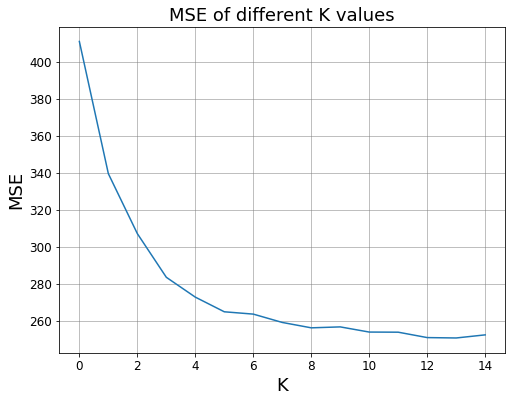

In [ ]:
mse_plot = pd.DataFrame(mse_vals)
plt.figure(figsize=(8,6))
plt.plot(mse_vals)
plt.rcParams.update({'font.size': 12})
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('K', fontsize=18) 
plt.ylabel('MSE', fontsize=18)

plt.title('MSE of different K values', fontsize=18)


In [ ]:
df_knn = df
X_k_train, X_k_val, y_k_train, y_k_val = key_cols(df_knn)

knn = KNeighborsRegressor(n_neighbors=23)
knn.fit(X_k_train, y_k_train)
y_predict = knn.predict(X_k_val)
errors = (y_predict != y_k_val).sum()
print(errors)
print(knn.score(X_k_val, y_k_val))
print('case2')
knn = KNeighborsRegressor(n_neighbors=30)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_val)
errors = (y_predict != y_val).sum()
print(errors)
print(knn.score(X_val, y_val))

2026
0.21258875361242865
case2
2025
0.1900989064782015


In [ ]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
df1 = df
X_train, X_val, y_train, y_val = all_cols(df1)
svr_poly.fit(X_train, y_train)
y_predict = svr_poly.predict(X_val)
print('wrong', (y_predict != y_val).sum())
print(svr_poly.score(X_val, y_val))
print(mse(y_val, y_predict))

wrong 2027
0.21669240964265535
241.49666392129788


### Random Forest 

In [ ]:
# Removing gender, size and colour
df1 = df
df1 = df1.drop(['gender', 'size', 'colour'], axis=1)
df1 = enc_cond(df1)
df1 = one_hot(df1, ['brand','category-1'])

X = df1.drop('price', axis=1) # inputs
y = df1['price'] # output
X_train, X_val, y_train, y_val = split_data(X, y, 3, 0.25) # split into 75/25
X_val, X_test, y_val, y_test = split_data(X_val, y_val, 3, 0.4) # split into 15/10

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(n_estimators = 100, random_state = 42) # random state similar to seed - allows reproduceability of results 
clf_rf.fit(X_train, y_train)
y_predict = clf_rf.predict(X_val)
print('Score: ', clf_rf.score(X_train, y_train)) # Best possible score is a 1, but make sure that the model isn't overfitted
errors = (y_predict != y_val).sum()
print('Errors: ', errors)
print('Score: ', clf_rf.score(X_val, y_val))

err = mse(y_val, y_predict) # the closer to 0 the better
print('Mean Squared Error:', err)


Score:  0.37423086350738355
Errors:  1214
Score:  0.25445105804502033
Mean Squared Error: 211.61983762364062


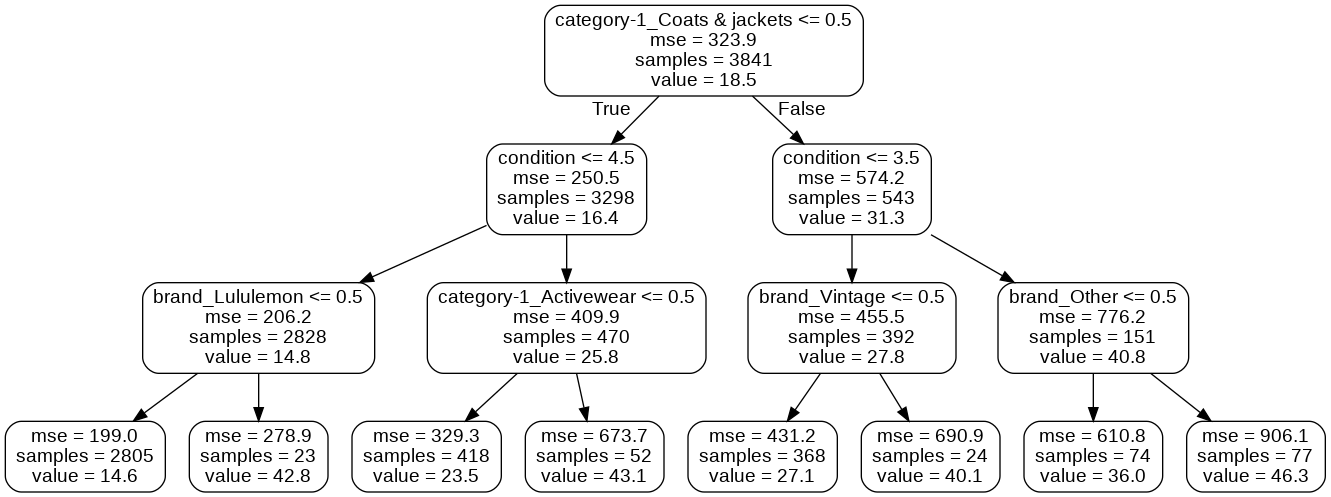

In [ ]:
# import numpy as np
labels = np.array(df1['price'])
features = df1.drop('price', axis = 1)
feature_list = list(features.columns)
features = np.array(features)
# print(features)

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

rf = clf_rf

# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

from IPython.display import Image
Image(filename = 'small_tree.png')

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: condition            Importance: 0.2
Variable: category-1_Coats & jackets Importance: 0.19
Variable: brand_Gymshark       Importance: 0.04
Variable: brand_Lululemon      Importance: 0.04
Variable: brand_Vintage        Importance: 0.04
Variable: brand_Free People    Importance: 0.03
Variable: category-1_Activewear Importance: 0.03
Variable: category-1_Shorts    Importance: 0.03
Variable: category-1_Tops & t-shirts Importance: 0.03
Variable: brand_Other          Importance: 0.02
Variable: category-1_Pants     Importance: 0.02
Variable: category-1_Sweaters  Importance: 0.02
Variable: brand_Abercrombie & Fitch Importance: 0.01
Variable: brand_Adidas         Importance: 0.01
Variable: brand_Anthropologie  Importance: 0.01
Variable: brand_Banana Republic Importance: 0.01
Variable: brand_Calvin Klein   Importance: 0.01
Variable: brand_Champion       Importance: 0.01
Variable: brand_EXPRESS        Importance: 0.01
Variable: brand_Forever 21     Importance: 0.01
Variable: brand_Guess 

[0, 7, 12, 21, 22, 26, 36, 39, 43, 54, 55, 60, 67, 68, 69, 70, 71, 72, 73, 74]


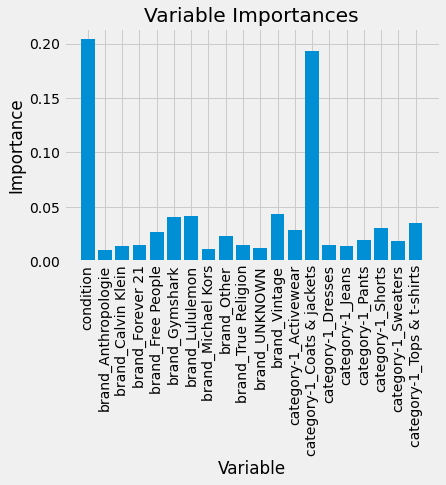

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')

# Cleaning up histogram to only show importances >= 0.01
newIdxList = [idx for idx, val in enumerate(importances) if val >= 0.01] 
print(newIdxList)

newImportances = []
newFeature_list = []

for idx in newIdxList:
  newImportances.append(importances[idx])
  newFeature_list.append(feature_list[idx])

# list of x locations for plotting
x_values = list(range(len(newImportances)))
# Make a bar chart
plt.bar(x_values, newImportances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, newFeature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

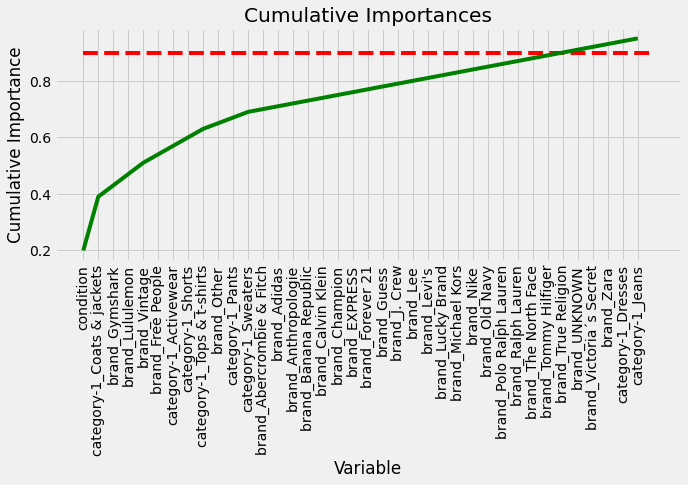

In [ ]:
# List of features sorted from most to least important

# Put tuples in new list if importance >=0.01 and then sort
newFeature_importances = [i for i in feature_importances if i[1] >= 0.01] 
newFeature_importances.sort(key=lambda x:x[1], reverse = True)
# Seperate into x and y 
sorted_importances = [importance[1] for importance in newFeature_importances]
sorted_features = [importance[0] for importance in newFeature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

xVal = list(range(len(newFeature_importances)))
plt.figure(figsize=(10,4)) # Set figure size 

# Make a line graph
plt.plot(xVal, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(xVal, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance');
plt.title('Cumulative Importances');

plt.show()


### XGBoost

MSE: 304.699360


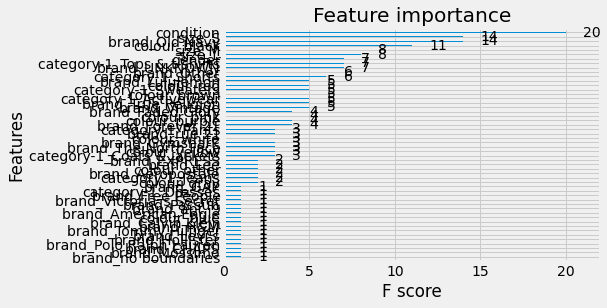

In [ ]:
import xgboost as xgb
df1 = df
X_train, X_val, y_train, y_val = all_cols(df1)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
pred = xg_reg.predict(X_val)
err = (mse(y_val, pred))
print("MSE: %f" % (err))

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10, num_boost_round=50,early_stopping_rounds=10, as_pandas=True, seed=123)

# A, b = X.iloc[:,:-1],X.iloc[:,-1]
# data_dmatrix = xgb.DMatrix(data=A,label=b)

# params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 3, 'alpha': 10}
# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10, as_pandas=True, seed=123)
# xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
# xgb.plot_tree(xg_reg,rankdir='LR', num_trees=0)
# plt.rcParams['figure.figsize'] = [10,20]
# plt.show()
import seaborn as sns
xgb.plot_importance(xg_reg)
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

# Cross Validation

In [ ]:
# Cross Validation 
df1 = df
df1 = df1.drop(['gender', 'size', 'colour'], axis=1)
df1 = enc_cond(df1)
df1 = one_hot(df1, ['brand','category-1'])
X = df1.drop('price', axis=1) # inputs
y = df1['price'] # output

df2 = df
#df2 = df2.drop(['gender', 'size', 'colour'], axis=1)
df2 = enc_gen(df2)
df2 = enc_cond(df2)
df2 = one_hot(df2, ['size','colour','brand','category-1'])
X2 = df2.drop('price', axis=1) # inputs
y2 = df2['price'] # output

# Random forest used below but change as necessary
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
 # K(=10) fold cross validation, default scoring is r2, specify scoring='neg_mean_squared_error' to use MSE (gives -'ve so abs mean and std)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
cvScore = cross_val_score(clf_rf, X, y, cv = cv, scoring='r2')
cvScore2 = cross_val_score(clf_rf, X2, y2, cv = cv, scoring='r2')
# cvPredict = cross_val_predict(clf_rf, X, y, cv = cv)
print(cvScore)
print(cvScore2)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvScore.mean(), cvScore.std() * 2))
# cvMSE = cross_val_score(clf_rf, X, y, cv = cv, scoring='neg_mean_squared_error')
# print("MSE: %0.2f " % (cvMSE.mean()))
print("Accuracy: %0.2f (+/- %0.2f)" % (cvScore2.mean(), cvScore2.std() * 2))
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.scatter(y, cvPredict, edgecolors=(0, 0, 0))
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Measure')
# ax.set_ylabel('Predicted')
# plt.show()

[0.19530492 0.25016021 0.24552078 0.20150954 0.19847373 0.16175285
 0.25776462 0.2723231  0.26374916 0.23563337]
[0.11892084 0.14680806 0.18959569 0.18148833 0.08437283 0.134074
 0.20615105 0.18591739 0.16750237 0.14676511]
Accuracy: 0.23 (+/- 0.07)
Accuracy: 0.16 (+/- 0.07)


In [ ]:
# Linear Regression cross validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
cvScore = cross_val_score(clf, X, y, cv = cv, scoring='r2')
cvScore2 = cross_val_score(clf, X2, y, cv = cv, scoring='r2')
print(cvScore)
print(cvScore2)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvScore.mean(), cvScore.std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cvScore2.mean(), cvScore2.std() * 2))

[0.19435288 0.25007885 0.25631693 0.23375242 0.23517062 0.22828268
 0.27353041 0.26094784 0.26861778 0.25651595]
[0.21836171 0.26754546 0.26738065 0.24758063 0.2413879  0.22349074
 0.2928577  0.2640054  0.27715682 0.27476078]
Accuracy: 0.25 (+/- 0.04)
Accuracy: 0.26 (+/- 0.05)


In [ ]:
# Ridge cross validation
cvScore = cross_val_score(clf_ridge, X, y, cv = cv, scoring='r2')
cvScore2 = cross_val_score(clf_ridge, X2, y, cv = cv, scoring='r2')
print(cvScore)
print(cvScore2)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvScore.mean(), cvScore.std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cvScore2.mean(), cvScore2.std() * 2))

[0.19627183 0.25021246 0.25743822 0.23318798 0.23652874 0.22744364
 0.27344579 0.26292977 0.26827875 0.25662261]
[0.21873148 0.26946503 0.26831321 0.24698243 0.24111393 0.22163936
 0.29337922 0.26403495 0.27914107 0.27387265]
Accuracy: 0.25 (+/- 0.04)
Accuracy: 0.26 (+/- 0.05)


In [ ]:
# XGBoost cross validation
xgbr = xgb.XGBRegressor(verbosity=0) 
cvScore = cross_val_score(xgbr, X, y, cv = cv, scoring='r2')
cvScore2 = cross_val_score(xgbr, X2, y, cv = cv, scoring='r2')
print(cvScore)
print(cvScore2)
print("Accuracy: %0.2f (+/- %0.2f)" % (cvScore.mean(), cvScore.std() * 2))
print("Accuracy: %0.2f (+/- %0.2f)" % (cvScore2.mean(), cvScore2.std() * 2))

[0.21281396 0.2659908  0.26981949 0.21784906 0.22121335 0.23072915
 0.28776826 0.26971817 0.27031175 0.25029563]
[0.23064038 0.28407161 0.28450947 0.23050088 0.21985892 0.23295817
 0.30889451 0.28594473 0.27288865 0.26497591]
Accuracy: 0.25 (+/- 0.05)
Accuracy: 0.26 (+/- 0.06)
